# Here is presented the first exploration on the [Stanford dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)

There are also the different data augmentation steps:
* Changing to gray scale
* Equalizing the images
* Vertical and horizontal flipping
* Various rotations
* Random zooms (and the check to know wether or not the dog is still on the image
* Random translations (same)


In [5]:
import tensorflow as tf
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  !ls /content/gdrive/My\ Drive/Formation-OC/P5-Stackoverflow
  root_dir = '/content/gdrive/My Drive/Formation-OC/P6-Images/'
  input_dir = root_dir + 'inputs/'
  png_dir = root_dir + 'pngs/'

  #my script
  !ls gdrive/MyDrive/Formation-OC/P6-Images/
else:
  print('Not running on CoLab')
  #my script
  root_dir = '/Users/jeremynadal/Documents/Formation OC IML/P6/'
  input_dir = root_dir + 'inputs/'
  png_dir = root_dir + 'pngs/'
  model_dir = root_dir +'models/'

Not running on CoLab


## Lets see how many images and classes we have

In [77]:
species = os.listdir(input_dir+'Images/')
species = [specie for specie in species if specie !='.DS_Store']
print('There are {} different species'.format(len(species)))

There are 120 different species


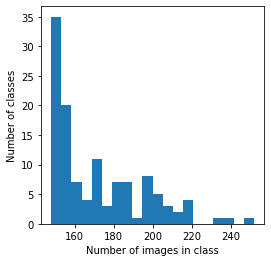

In [86]:
nb_img = [len(os.listdir(input_dir+'Images/'+specie)) for specie in species ]
plt.figure(figsize=(4,4))
plt.hist(nb_img,bins=20)
plt.xlabel('Number of images in class')
plt.ylabel('Number of classes')
plt.show()


In [55]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(int)


In [56]:
specie_nb = 0
img_nb = 1
species = os.listdir(input_dir+'Images/')
test_img = input_dir+'Images/'+species[specie_nb]+'/'+os.listdir(input_dir+'Images/'+species[specie_nb])[img_nb]

test_img = '/Users/jeremynadal/Downloads/IMG20210128123402.jpg'

In [57]:
from matplotlib import image
img = image.imread(test_img)
gray_img = rgb2gray(img)
test = cv2.imread(test_img,0) #0 for grayscale -1 for rgb 
print(img.shape)
print(gray_img.shape)

(4000, 3000, 3)
(4000, 3000)


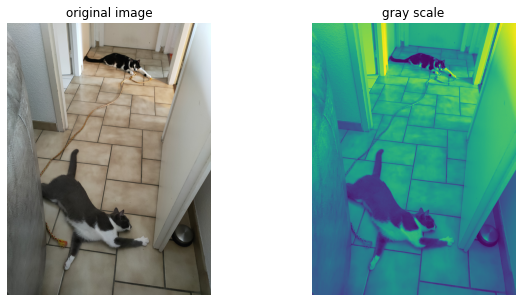

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

axes[0].imshow(img)
axes[0].set_title('original image')
axes[0].axis('off')

axes[1].imshow(gray_img)
axes[1].set_title('gray scale')
axes[1].axis('off')

plt.show()

In [65]:
## equalizing normal img
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_eq = cdf[img]

#calculating the new hist
hist,bins = np.histogram(img_eq.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized_eq = cdf * hist.max()/ cdf.max()

In [66]:
## equalizing gray scaled img
hist,bins = np.histogram(gray_img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized_gray = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
gray_img_eq = cdf[gray_img]

#calculating the new hist
hist,bins = np.histogram(gray_img_eq.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized_gray_eq = cdf * hist.max()/ cdf.max()

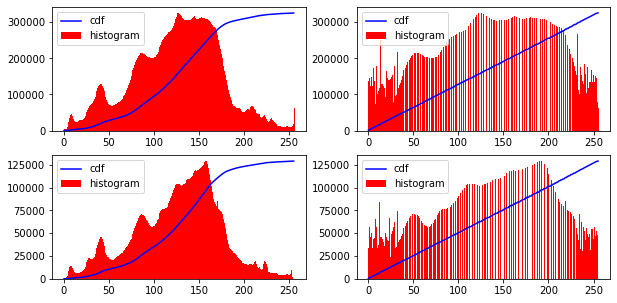

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=False)
axes = axes.flatten()
axes[0].plot(cdf_normalized, color = 'b')
axes[0].hist(img.flatten(),256,[0,256], color = 'r')
axes[0].legend(('cdf','histogram'), loc = 'upper left')

axes[1].plot(cdf_normalized_eq, color = 'b')
axes[1].hist(img_eq.flatten(),256,[0,256], color = 'r')
axes[1].legend(('cdf','histogram'), loc = 'upper left')



axes[2].plot(cdf_normalized_gray, color = 'b')
axes[2].hist(gray_img.flatten(),256,[0,256], color = 'r')
axes[2].legend(('cdf','histogram'), loc = 'upper left')

axes[3].plot(cdf_normalized_gray_eq, color = 'b')
axes[3].hist(gray_img_eq.flatten(),256,[0,256], color = 'r')
axes[3].legend(('cdf','histogram'), loc = 'upper left')



plt.show()

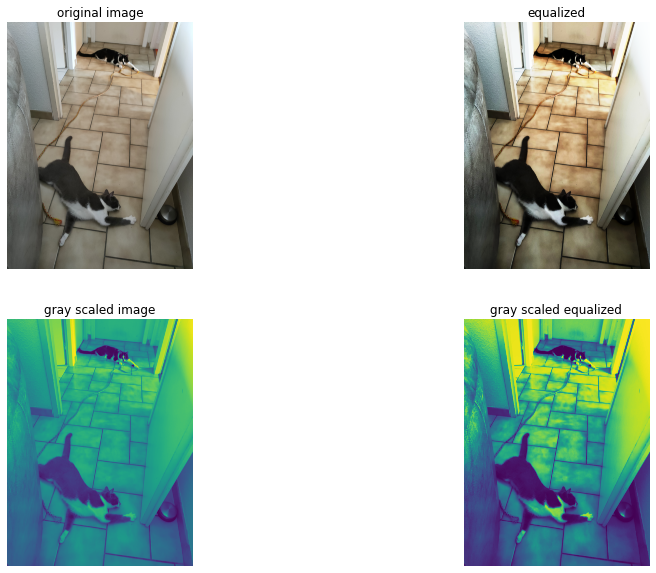

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False)
axes = axes.flatten()


axes[0].imshow(img)
axes[0].set_title('original image')
axes[0].axis('off')

axes[1].imshow(img_eq)
axes[1].set_title('equalized')
axes[1].axis('off')

axes[2].imshow(gray_img)
axes[2].set_title('gray scaled image')
axes[2].axis('off')

axes[3].imshow(gray_img_eq)
axes[3].set_title('gray scaled equalized')
axes[3].axis('off')


plt.show()